In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [94]:
tvdf = pd.read_csv("./tabulatedVotes.csv")
tvdf

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanSadResp,medianEmoResp,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm
0,100001,0,0,0,1,10,0,1001_IEO_NEU_XX,11,0.909091,...,-1.0,87.0,66.171320,-1.000000,-1.000000,-1.000000,97.894737,62.998978,-1.000000,83.333333
1,100002,0,0,0,3,6,0,1001_IEO_HAP_LO,9,0.666667,...,-1.0,72.0,53.816160,-1.000000,-1.000000,-1.000000,36.292735,62.577873,-1.000000,53.846154
2,100003,0,0,0,4,7,0,1001_IEO_HAP_MD,11,0.636364,...,-1.0,60.0,61.874713,-1.000000,-1.000000,-1.000000,55.165230,65.708703,-1.000000,61.111111
3,100004,2,0,0,6,2,0,1001_IEO_HAP_HI,10,0.600000,...,-1.0,69.5,52.927309,84.420185,-1.000000,-1.000000,56.542708,10.588235,-1.000000,66.308140
4,100005,1,1,0,0,7,1,1001_IEO_SAD_LO,10,0.700000,...,6.0,80.0,59.486728,12.941176,94.936709,-1.000000,-1.000000,69.123485,3.125000,75.182073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22321,307438,0,0,0,10,0,0,1091_WSI_HAP_XX,10,1.000000,...,-1.0,57.0,62.391370,-1.000000,-1.000000,-1.000000,62.391370,-1.000000,-1.000000,58.307858
22322,307439,0,0,0,0,5,4,1091_WSI_SAD_XX,9,0.555556,...,69.0,62.0,53.971355,-1.000000,-1.000000,-1.000000,-1.000000,46.816122,62.915396,58.536585
22323,307440,9,1,0,0,0,0,1091_WSI_ANG_XX,10,0.900000,...,-1.0,67.5,65.129996,63.142343,83.018868,-1.000000,-1.000000,-1.000000,-1.000000,66.035088
22324,307441,0,0,7,0,2,0,1091_WSI_FEA_XX,9,0.777778,...,-1.0,53.0,52.685539,-1.000000,-1.000000,43.821883,-1.000000,83.708333,-1.000000,56.521739


In [93]:

dataset = pd.read_csv("./summaryTable.csv")
dataset

,Unnamed: 0,FileName,VoiceVote,VoiceLevel,FaceVote,FaceLevel,MultiModalVote,MultiModalLevel
0,1,1001_IEO_NEU_XX,N,69.1,N,92.22,N,64.78
1,2,1001_IEO_HAP_LO,N,71.67,H,57,H,57.38
2,3,1001_IEO_HAP_MD,N,67.71,H,62.62,H,56.56
3,4,1001_IEO_HAP_HI,H,63.5,H,68.25,H,73.2
4,5,1001_IEO_SAD_LO,N,73.71,N,73.5,N,74.8
...,...,...,...,...,...,...,...,...
7437,7438,1091_WSI_HAP_XX,N,68.12,H,65.12,H,64.8
7438,7439,1091_WSI_SAD_XX,N,55.67,N,71.57,N,48.8
7439,7440,1091_WSI_ANG_XX,A,34.4,A,50.43,A,67.11
7440,7441,1091_WSI_FEA_XX,S,39.67,F,68.29,F,51.71


# Voice Modality

## Votes

In [69]:
vv = dataset["VoiceVote"]
vvc = dataset["VoiceVote"].value_counts()
#vvdf = pd.DataFrame(vvc)
vvdf = pd.DataFrame({'Frequency':vvc})
vvdf = vvdf[vvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]
vvdf

,Frequency
N,3897
A,986
F,645
D,547
S,370
H,353


In [70]:
pervv = vv.value_counts(normalize=True) * 100

vvdf['Percent'] = pervv
vvdf

,Frequency,Percent
N,3897,52.364956
A,986,13.249127
F,645,8.667025
D,547,7.350175
S,370,4.971782
H,353,4.743349


In [71]:
fv = dataset["FaceVote"]
fvc = dataset["FaceVote"].value_counts()
fvdf = pd.DataFrame({'Frequency':fvc})
fvdf = fvdf[fvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]
fvdf

,Frequency
N,2076
H,1266
D,1057
A,968
F,822
S,783


In [72]:
perfv = fv.value_counts(normalize=True) * 100

fvdf['Percent'] = perfv
fvdf

,Frequency,Percent
N,2076,27.895727
H,1266,17.011556
D,1057,14.203171
A,968,13.007256
F,822,11.045418
S,783,10.521365


## MultiModal (Voice and Face)

In [73]:
mv = dataset["MultiModalVote"]
mvc = dataset["MultiModalVote"].value_counts()
mvdf = pd.DataFrame({'Frequency':mvc})
mvdf = mvdf = mvdf[mvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]

In [74]:
permv = mv.value_counts(normalize=True) * 100

mvdf['Percent'] = permv
mvdf

,Frequency,Percent
N,1972,26.498253
H,1219,16.380005
D,1139,15.305026
F,1084,14.565977
A,1019,13.692556
S,589,7.914539


# Comparison

In [80]:
df = pd.DataFrame({'Voice':vvdf["Frequency"], 'Face':fvdf["Frequency"], 'Multimodal':mvdf["Frequency"]})
df

,Voice,Face,Multimodal
A,986,968,1019
D,547,1057,1139
F,645,822,1084
H,353,1266,1219
N,3897,2076,1972
S,370,783,589


In [81]:
df = df.T
df = df.fillna(0)
df

,A,D,F,H,N,S
Voice,986,547,645,353,3897,370
Face,968,1057,822,1266,2076,783
Multimodal,1019,1139,1084,1219,1972,589


In [82]:
dfd = df.describe()
dfd

,A,D,F,H,N,S
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,991.000000,914.333333,850.333333,946.000000,2648.333333,580.666667
std,25.865034,320.751202,220.867230,514.090459,1082.626590,206.626071
min,968.000000,547.000000,645.000000,353.000000,1972.000000,370.000000
25%,977.000000,802.000000,733.500000,786.000000,2024.000000,479.500000
50%,986.000000,1057.000000,822.000000,1219.000000,2076.000000,589.000000
75%,1002.500000,1098.000000,953.000000,1242.500000,2986.500000,686.000000
max,1019.000000,1139.000000,1084.000000,1266.000000,3897.000000,783.000000


In [83]:
df.mean()

A     991.000000
D     914.333333
F     850.333333
H     946.000000
N    2648.333333
S     580.666667
dtype: float64

In [84]:
df = pd.DataFrame({'Anger':df["A"], 'Disgust':df["D"], 'Fear':df["F"], 'Sad':df["S"], 'Happy':df["H"], 'Neutral':df["N"]})
df

,Anger,Disgust,Fear,Sad,Happy,Neutral
Voice,986,547,645,370,353,3897
Face,968,1057,822,783,1266,2076
Multimodal,1019,1139,1084,589,1219,1972


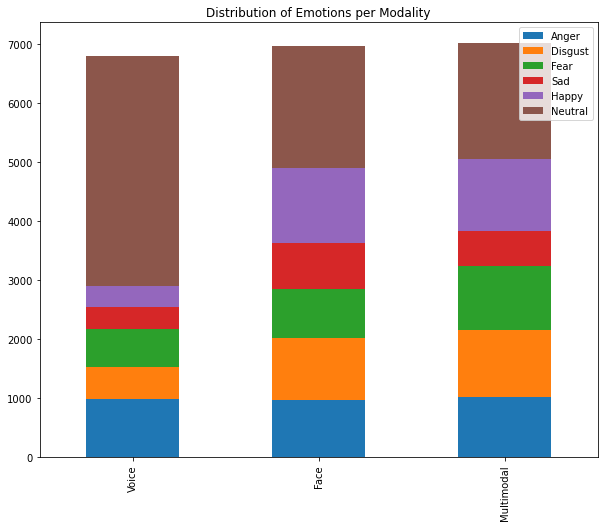

In [57]:
bar_stacked = df.plot(kind='bar', stacked=True, title='Distribution of Emotions per Modality', figsize=(10,8))

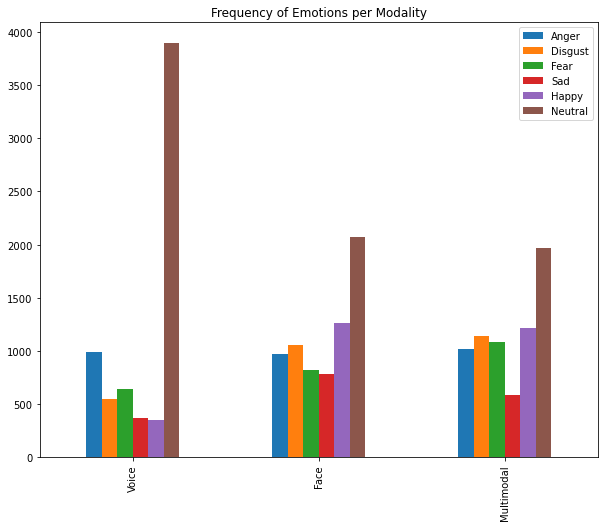

In [85]:
bar = df.plot(kind='bar', title='Frequency of Emotions per Modality', figsize=(10,8))

In [ ]:
df.describe()

## Central Tendency

In [88]:
df.std()

Anger        25.865034
Disgust     320.751202
Fear        220.867230
Sad         206.626071
Happy       514.090459
Neutral    1082.626590
dtype: float64

In [89]:
df.var()

Anger      6.690000e+02
Disgust    1.028813e+05
Fear       4.878233e+04
Sad        4.269433e+04
Happy      2.642890e+05
Neutral    1.172080e+06
dtype: float64

In [ ]:
df.median()

In [ ]:
df.mode()

In [ ]:
dataset1 = dataset[['VoiceVote', 'FaceVote', 'MultiModalVote']]
dataset1

In [ ]:
dataset1.describe()

## Measures of Frequency 
### A. Voice column

In [ ]:
vvdf

In [98]:
leveldf = dataset[["VoiceLevel", "FaceLevel", "MultiModalLevel"]]
leveldf = leveldf.T
leveldf

,0,1,2,3,4,5,6,7,8,9,...,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441
VoiceLevel,69.1,71.67,67.71,63.5,73.71,42.12,60.14,59.57,37.2:58.6,67,...,68.2,72.25,68.43,45.33,59.12,68.12,55.67,34.4,39.67,53.75
FaceLevel,92.22,57,62.62,68.25,73.5,82.44,30.67:51.00,52.6,45.5,65.56,...,59.67:34.33:58.00,73.44,48.67,91.83,64.11,65.12,71.57,50.43,68.29,68.5
MultiModalLevel,64.78,57.38,56.56,73.2,74.8,72.33,63.5,78,44.2,63.25,...,51,72,61.62,66.89,74.44,64.8,48.8,67.11,51.71,71


In [97]:
leveldf.describe()

,VoiceLevel,FaceLevel,MultiModalLevel
count,7442,7442,7442
unique,2076,1951,2037
top,65,69,67
freq,43,43,43
